In [61]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

### Задание 1
Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро)

In [18]:
n = 1
for i in range(0, n):
    x = np.random.randint(0, 37)
    print(x)

27


### Задание 2
Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9

[6.173209410555914, 7.627712838582637, 4.626983718394137, 4.219177400192892, 5.824790830938882, 3.983169143038985, 4.151725117674271, 3.1265293772155336, 6.840507860236236, 3.9796090579325543]


(array([1., 4., 1., 0., 2., 1., 1.]),
 array([3.12652938, 3.76955559, 4.41258179, 5.055608  , 5.69863421,
        6.34166042, 6.98468663, 7.62771284]),
 <a list of 7 Patch objects>)

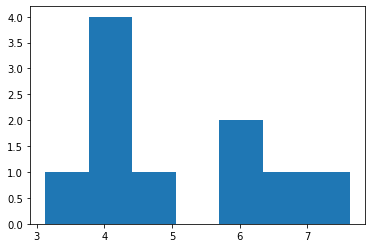

In [40]:
a = []
for i in range(10):
    x = np.random.rand(10)
    a.append(x.sum())
print(a)
plt.hist(a, bins=7)

### Задание 3.1
Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

Сначала перепишем пример из урока для последующего сравнения результатов.

In [53]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
# print(a, b, c, d)
# print(x)
print(k, n, k/n)

3810 10000 0.381


Т.к. для подбрасывания монетки $p = q = \dfrac {1}{2}$, формула Бернулли будет выглядеть следующим образом: $ P_n(k) = C_{n}^k \cdot \dfrac {1}{2^n}$. Как известно $C_{n}^k = \dfrac {n!}{k! \cdot (n - k)!}$. Подставим вторую формулу в первую и напишем код для подсчета вероятности.

In [55]:
def bernulli(n, k):
    return np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k) * (2 ** n))

In [56]:
n, k = 4, 2
p = bernulli(n, k)
print(p)

0.375


Видим что результат примерно одинаковый.

### Задание 3.2
Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

Посчитаем для начала веероятность одного орла в четырех испытаниях.

In [57]:
n, k = 4, 1
p = bernulli(n, k)
print(p)

0.25


Теперь посчитаем вероятность выпадения трех орлов в четырех испытаниях.

In [58]:
n, k = 4, 3
p = bernulli(n, k)
print(p)

0.25


Ни одного орла в 4х испытаниях.

In [59]:
n, k = 4, 0
p = bernulli(n, k)
print(p)

0.0625


4 орла в 4х испытаниях.

In [60]:
n, k = 4, 4
p = bernulli(n, k)
print(p)

0.0625


Если проссумируем все вероятности возможных исходов при 4х испытаниях получим $p = 1$ как и должно получиться.

### Задание 4
Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k.

$n = 6, k = 2$

Размещения

In [66]:
for p in itertools.permutations('012345', 2):
    print(''.join(p))

01
02
03
04
05
10
12
13
14
15
20
21
23
24
25
30
31
32
34
35
40
41
42
43
45
50
51
52
53
54


Сочетания

In [69]:
for p in itertools.combinations('012345', 2):
    print(''.join(p))

01
02
03
04
05
12
13
14
15
23
24
25
34
35
45


### Задание 5
Дополните код расчетом коэффициента корреляции x и y по формуле
$$R = \dfrac{\displaystyle\sum(x_i - x_m)\cdot(y_i - y_m)}{\sqrt{\displaystyle\sum(x_i - x_m)^2\cdot\displaystyle\sum(y_i - y_m)^2}}$$

0.7273585465275806 0.12760281965933692
0.7273585465275807 0.12760281965933698
[[1.         0.93003308]
 [0.93003308 1.        ]]
0.9300330802179091


/Users/spouk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


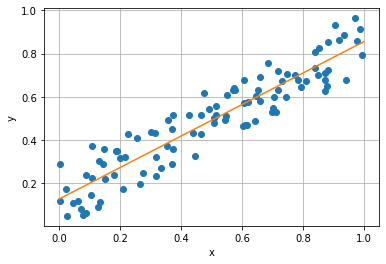

In [73]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r * x + (1 - r) * np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

a = (np.sum(x) * np.sum(y) - n * np.sum(x * y)) / (np.sum(x) * np.sum(x) - n * np.sum(x * x))
b = (np.sum(y) - a * np.sum(x)) / n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
c = np.corrcoef(x,y)
print(c)
r = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sqrt(np.sum((x - np.mean(x)) ** 2) * np.sum((y - np.mean(y)) ** 2))
print(r)
plt.show()

Видим что коэффициенты корреляции, посчитанные автоматически и с помощью формулы, одинаковы.